In [103]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df_org = pd.read_json('Data/News_Category_Dataset_v2.json',lines=True)
df_org['id'] = range(len(df_org)) 
df_org

,category,headline,authors,link,short_description,date,id
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26,0
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26,1
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,2
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26,3
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26,4
...,...,...,...,...,...,...,...
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,"Reuters, Reuters",https://www.huffingtonpost.com/entry/rim-ceo-t...,Verizon Wireless and AT&T are already promotin...,2012-01-28,200848
200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,,https://www.huffingtonpost.com/entry/maria-sha...,"Afterward, Azarenka, more effusive with the pr...",2012-01-28,200849
200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...",,https://www.huffingtonpost.com/entry/super-bow...,"Leading up to Super Bowl XLVI, the most talked...",2012-01-28,200850
200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,,https://www.huffingtonpost.com/entry/aldon-smi...,CORRECTION: An earlier version of this story i...,2012-01-28,200851


In [3]:
df_org[['id','authors']].groupby('authors')['id'].size().reset_index().sort_values('id', ascending = False).head(30)

,authors,id
0,,36620
16031,Lee Moran,2423
23063,Ron Dicker,1913
22335,"Reuters, Reuters",1562
7959,Ed Mazza,1322
5353,Cole Delbyck,1140
1696,Andy McDonald,1068
13769,Julia Brucculieri,1059
4149,Carly Ledbetter,1054
5634,Curtis M. Wong,1020


Tenemos a mas de 36k de articulos sin autor. Eliminemos estos y los que tengan pocos conteos.

In [63]:
df = df_org[df_org['authors']!='']
len(df)

164233

Parece que algunos autores tienen una ",". Quitemos lo que hay despues de la coma para obtener bien los conteos de aquellos que aparecen sin y con comas.

In [66]:
df['authors_mod'] = df.apply(lambda x: x['authors'].lower().split(','), axis = 1)
df_exp = df.explode('authors_mod')
df_exp['authors_mod'] = df_exp.apply(lambda x: x['authors_mod'].strip(), axis = 1)
len(df_exp)

c:\users\mauricio\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


309987

In [67]:
df_exp.tail()

,category,headline,authors,link,short_description,date,id,authors_mod
200845,TECH,Web Wars,"John Giacobbi, Contributor\nTales from the Int...",https://www.huffingtonpost.com/entry/congress-...,"These ""Web Wars"" threaten to rage on for some ...",2012-01-28,200845,john giacobbi
200845,TECH,Web Wars,"John Giacobbi, Contributor\nTales from the Int...",https://www.huffingtonpost.com/entry/congress-...,"These ""Web Wars"" threaten to rage on for some ...",2012-01-28,200845,contributor\ntales from the interweb by the we...
200847,TECH,Watch The Top 9 YouTube Videos Of The Week,Catharine Smith,https://www.huffingtonpost.com/entry/watch-top...,If you're looking to see the most popular YouT...,2012-01-28,200847,catharine smith
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,"Reuters, Reuters",https://www.huffingtonpost.com/entry/rim-ceo-t...,Verizon Wireless and AT&T are already promotin...,2012-01-28,200848,reuters
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,"Reuters, Reuters",https://www.huffingtonpost.com/entry/rim-ceo-t...,Verizon Wireless and AT&T are already promotin...,2012-01-28,200848,reuters


In [68]:
df_exp.drop_duplicates(subset=None,inplace=True)
len(df_exp)

307638

<AxesSubplot:ylabel='Frequency'>

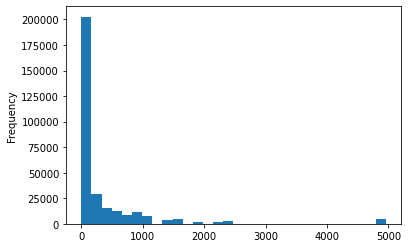

In [70]:
df_exp['count_by_author'] = df_exp.groupby('authors_mod')['id'].transform('count')
df_exp['count_by_author'].plot.hist(bins = 30)

In [71]:
df_authors = df_exp[df_exp['count_by_author']>50]
len(df_authors)

141718

In [72]:
authors_grouped = df_authors[['id','authors_mod']].groupby('authors_mod')['id'].size().reset_index().sort_values('id', ascending = False)
len(authors_grouped)

661

El número de autores con mas de 50 articulos sube a 661 después del pre-procesamiento de los textos de los autores.

Eliminemos a reuters dado que rompe el supuesto que es un autor

In [100]:
authors_grouped = df_authors[['id','category','authors_mod']].groupby(['category','authors_mod'])['id'].size().reset_index().sort_values('id', ascending = False)
authors_mat = authors_grouped.pivot_table (index='authors_mod',
                             columns = 'category',
                             values='id',
                             fill_value = 0)
authors_mat

category,ARTS,ARTS & CULTURE,BLACK VOICES,BUSINESS,COLLEGE,COMEDY,CRIME,CULTURE & ARTS,DIVORCE,EDUCATION,...,TASTE,TECH,THE WORLDPOST,TRAVEL,WEDDINGS,WEIRD NEWS,WELLNESS,WOMEN,WORLD NEWS,WORLDPOST
authors_mod,,,,,,,,,,,,,,,,,,,,,
"""arab voices""",0,0,0,0,0,0,0,0,0,0,...,0,0,6,0,0,0,0,0,12,0
' coauthor,0,0,0,22,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
'arab voices',0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
'kerouac's spontaneous poetics',10,0,0,0,0,0,0,5,0,0,...,0,0,1,0,0,0,0,1,0,0
...,9,0,17,16,2,10,5,6,28,9,...,3,2,2,9,4,1,56,7,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yagana shah,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zach carter,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zahara hill,0,0,75,0,0,2,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [104]:
np_mat = authors_mat.to_numpy()
sum_of_rows = np_mat.sum(axis=1)
normalized_array = np_mat / sum_of_rows[:, np.newaxis]

normalized_array

array([[0.        , 0.        , 0.        , ..., 0.        , 0.21428571,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.03225806, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.10989011],
       ...,
       [0.        , 0.        , 0.78125   , ..., 0.01041667, 0.        ,
        0.        ],
       [0.        , 0.00865801, 0.73593074, ..., 0.1991342 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [171]:
from sklearn.metrics.pairwise import chi2_kernel
from sklearn.cluster import SpectralClustering
for index, gamma in enumerate((0.01,0.1,1,10)):
    for index, k in enumerate((4,6,8,10,12,14,16,18,20)):
        X = chi2_kernel(normalized_array, gamma=gamma)
        y_pred = SpectralClustering(n_clusters=k, affinity='precomputed').fit_predict(X)
        print(f"Calinski-Harabasz Score with gamma={gamma}, n_clusters={k}, score:{metrics.calinski_harabasz_score(X, y_pred)}")

Calinski-Harabasz Score with gamma=0.01, n_clusters=4, score:286.6552667438334
Calinski-Harabasz Score with gamma=0.01, n_clusters=6, score:248.87279384656287
Calinski-Harabasz Score with gamma=0.01, n_clusters=8, score:269.7644945565519
Calinski-Harabasz Score with gamma=0.01, n_clusters=10, score:228.06940554344797
Calinski-Harabasz Score with gamma=0.01, n_clusters=12, score:197.02116263602366
Calinski-Harabasz Score with gamma=0.01, n_clusters=14, score:166.08134273627246
Calinski-Harabasz Score with gamma=0.01, n_clusters=16, score:189.07735870278722
Calinski-Harabasz Score with gamma=0.01, n_clusters=18, score:157.16724453476354
Calinski-Harabasz Score with gamma=0.01, n_clusters=20, score:109.20252120762866
Calinski-Harabasz Score with gamma=0.1, n_clusters=4, score:288.0731001616233
Calinski-Harabasz Score with gamma=0.1, n_clusters=6, score:253.56191294654806
Calinski-Harabasz Score with gamma=0.1, n_clusters=8, score:277.4116549871277
Calinski-Harabasz Score with gamma=0.1, n

In [173]:
X = chi2_kernel(normalized_array, gamma=1)
X.shape
model = SpectralClustering(random_state=0, n_clusters=4,
                           affinity='precomputed'
                           ).fit(X)
labels = model.labels_
labels.shape

(660,)

In [174]:
clusters = pd.concat([authors_mat.reset_index(),pd.DataFrame({'label':labels})], axis = 1)
clusters

,authors_mod,ARTS,ARTS & CULTURE,BLACK VOICES,BUSINESS,COLLEGE,COMEDY,CRIME,CULTURE & ARTS,DIVORCE,...,TECH,THE WORLDPOST,TRAVEL,WEDDINGS,WEIRD NEWS,WELLNESS,WOMEN,WORLD NEWS,WORLDPOST,label
0,"""arab voices""",0,0,0,0,0,0,0,0,0,...,0,6,0,0,0,0,0,12,0,3
1,' coauthor,0,0,0,22,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,1
2,'arab voices',0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10,3
3,'kerouac's spontaneous poetics',10,0,0,0,0,0,0,5,0,...,0,1,0,0,0,0,1,0,0,1
4,...,9,0,17,16,2,10,5,6,28,...,2,2,9,4,1,56,7,7,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,yagana shah,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
656,zach carter,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
657,zahara hill,0,0,75,0,0,2,0,0,0,...,0,0,0,0,0,0,1,0,0,1
658,zeba blay,0,2,170,0,0,0,0,0,0,...,0,0,0,0,0,0,46,0,0,1


In [187]:
clusters_tall = clusters.melt(id_vars=['authors_mod','label'])
final_clusters = clusters_tall[clusters_tall['value']!=0].groupby(['authors_mod','label'])['variable'].apply(','.join).reset_index()

In [208]:
import math
def plot_freq_x_context(df,category_colname = 'category',n = 5, ncols = 4):
    """
    Function that, given a pandas dataframe and a category column,
    plots the first n most frrequent words for that category
    """
    categories = list(df[category_colname].unique())
    categories.sort()
    nrows = math.ceil(len(categories)/ncols)
    fig, axs = plt.subplots(nrows,ncols,figsize=(15, 15))
    fig.suptitle('Frequency by Category', fontsize=16)
    plt.subplots_adjust(hspace= 0.4, wspace = 0.6)

    for (i,cont) in enumerate(categories):
        a = i//ncols
        b = i%ncols
        df_ = df[df[category_colname] == cont].head(n)
        axs[a, b].barh(df_['tok'] , df_['count'])
        axs[a, b].invert_yaxis()
        axs[a, b].set_title(cont)

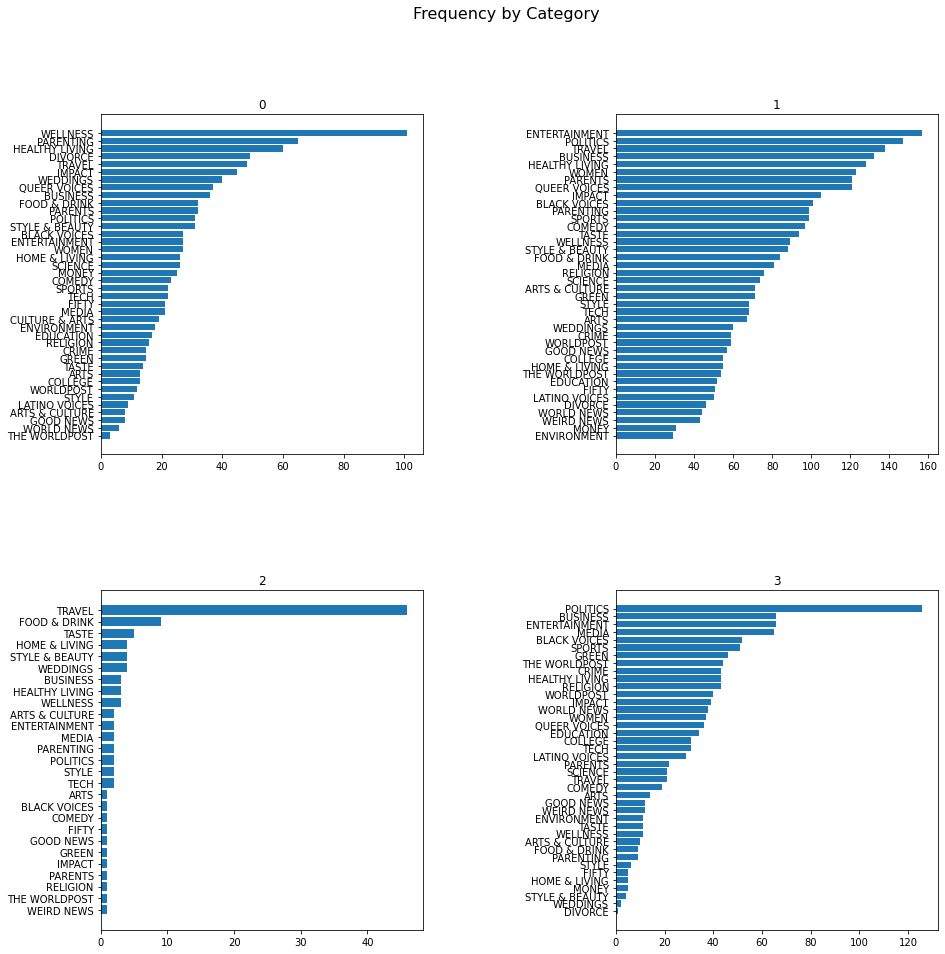

In [209]:
final_clusters['tok'] = final_clusters.apply(lambda x: x['variable'].split(','), axis = 1)
clusters_exp = final_clusters.explode('tok')
grouped_toks = (clusters_exp[['authors_mod','label','tok']]
     .groupby(['label','tok'])
     .agg({'authors_mod':['count']})
     .sort_values(['label',('authors_mod', 'count')], ascending = False)
     .reset_index())
grouped_toks.columns = [x[0] for x in grouped_toks.columns]
grouped_toks = grouped_toks.rename(columns = {'authors_mod':'count'})
grouped_toks
plot_freq_x_context(grouped_toks, category_colname = 'label', ncols = 2, n=40)

In [184]:
final_clusters.groupby('label').size()

label
0    101
1    387
2     46
3    126
dtype: int64